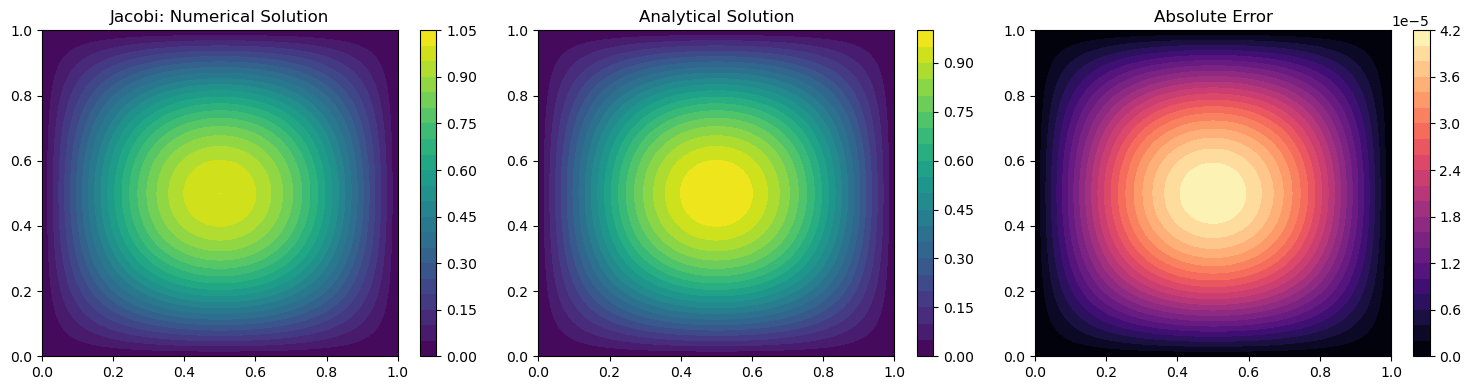

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# 设置网格参数
nx, ny = 101, 101
Lx, Ly = 1.0, 1.0
dx = Lx / (nx - 1)
dy = Ly / (ny - 1)
x = np.linspace(0, Lx, nx)
y = np.linspace(0, Ly, ny)
X, Y = np.meshgrid(x, y, indexing='ij')

# 构造泊松方程右端项 f(x,y) 和解析解
def rhs_func(x, y):
    return -2 * (np.pi ** 2) * np.sin(np.pi * x) * np.sin(np.pi * y)

def analytical_solution(x, y):
    return np.sin(np.pi * x) * np.sin(np.pi * y)

# 初始化变量
f = rhs_func(X, Y)
p_jacobi = np.zeros_like(f)
p_exact = analytical_solution(X, Y)

# Jacobi 方法参数
tol = 1e-6
max_iter = 50000
error = 1.0

# Dirichlet 边界条件：p = 0
p_jacobi[0, :] = p_jacobi[-1, :] = 0
p_jacobi[:, 0] = p_jacobi[:, -1] = 0

# Jacobi 解泊松方程 Δp = f
for it in range(max_iter):
    p_old = p_jacobi.copy()
    p_jacobi[1:-1, 1:-1] = 0.25 * (
        p_old[2:, 1:-1] + p_old[:-2, 1:-1] +
        p_old[1:-1, 2:] + p_old[1:-1, :-2] -
        f[1:-1, 1:-1] * dx * dy
    )

    error = np.linalg.norm(p_jacobi - p_old, ord=2)
    if error < tol:
        break

# 可视化数值解与解析解
fig, axs = plt.subplots(1, 3, figsize=(15, 4))
cs0 = axs[0].contourf(X, Y, p_jacobi, 20, cmap='viridis')
fig.colorbar(cs0, ax=axs[0])
axs[0].set_title("Jacobi: Numerical Solution")

cs1 = axs[1].contourf(X, Y, p_exact, 20, cmap='viridis')
fig.colorbar(cs1, ax=axs[1])
axs[1].set_title("Analytical Solution")

cs2 = axs[2].contourf(X, Y, np.abs(p_jacobi - p_exact), 20, cmap='magma')
fig.colorbar(cs2, ax=axs[2])
axs[2].set_title("Absolute Error")

plt.tight_layout()
plt.show()
